In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
video_path = r'032fa596158155a8c93f8fe5747fb80f.mp4'
capture = cv2.VideoCapture(video_path)

count = 0
frame1, frame2 = None, None
while True:
    ret, frame = capture.read()
    count += 1
    if not ret:
        break
    if count == 100:
        frame1 = frame
    if count == 3000:
        frame2 = frame
    if count >= 3000:
        break

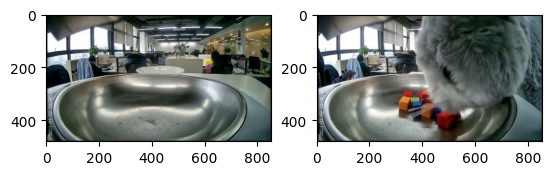

In [3]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(frame1)
plt.subplot(122)
plt.imshow(frame2)
plt.show()

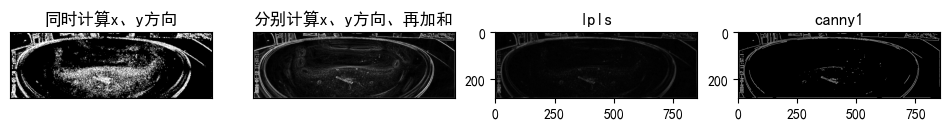

In [4]:
#同时计算x、y方向

image = frame1[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=1, delta=0)
lpls1 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls1, cmap="gray")
plt.title("lpls")

Canny1=cv2.Canny(image,220,250) 

plt.subplot(144)
plt.imshow(Canny1, cmap="gray")
plt.title("canny1")
plt.show()


In [5]:
cv2.imwrite('mask.jpg',dst)

True

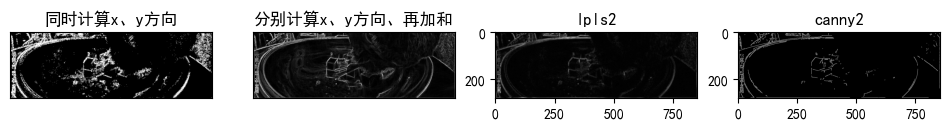

In [6]:

image = frame2[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)

plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=3, delta=0)
lpls2 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls2, cmap="gray")
plt.title("lpls2")

Canny2=cv2.Canny(image,220,250) 
plt.subplot(144)
plt.imshow(Canny2, cmap="gray")
plt.title("canny2")
plt.show()


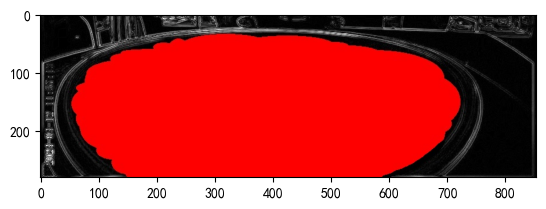

In [7]:
mask = cv2.imread("mask_red.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

In [8]:
print(mask.shape)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j,0] >= 240 and mask[i,j,1] <= 10 and mask[i,j,2] <= 10:
            mask[i,j,0] = 255
            mask[i,j,1] = 255
            mask[i,j,2] = 255
            continue
        else:
            mask[i,j,0] = 0
            mask[i,j,1] = 0
            mask[i,j,2] = 0

(280, 854, 3)


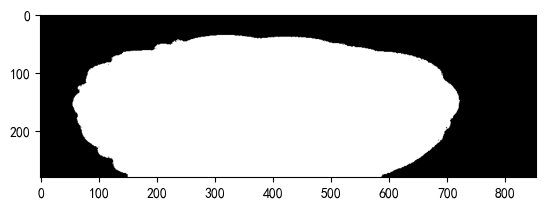

In [9]:
plt.imshow(mask)
plt.show()

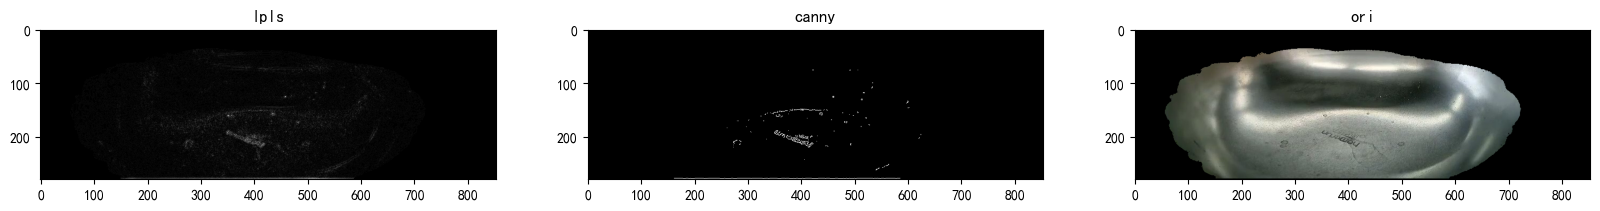

In [10]:
plt.figure(figsize=(20,10))
image1 = lpls1
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')

plt.subplot(132)
image1 = Canny1
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame1[200:,:,:]
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1)
plt.title('ori')
plt.show()

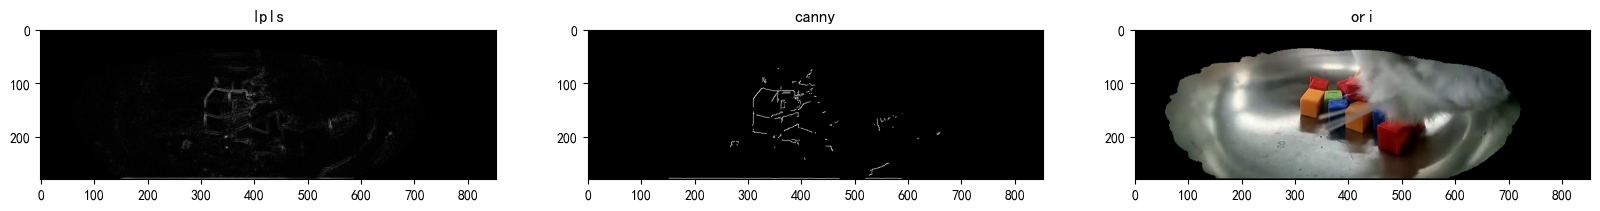

In [11]:
plt.figure(figsize=(20,10))
image1 = lpls2
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')
image1 = Canny2
plt.subplot(132)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame2[200:,:,:]
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1)
plt.title('ori')
plt.show()

In [12]:
contours, hierarchy = cv2.findContours(Canny2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [13]:
area = []
for j in range(len(contours)):
    area.append(cv2.contourArea(contours[j]))



In [14]:
index = np.argsort(area)

In [15]:
index

array([  0, 193, 195, 204, 207, 208, 209, 210, 211, 212, 213, 214, 217,
       219, 220, 221, 223, 226, 228, 229, 230, 231, 232, 233, 234, 235,
       189, 188, 187, 186, 127, 129, 134, 136, 137, 138, 139, 142, 144,
       152, 157, 158, 236, 160, 163, 167, 168, 169, 171, 173, 174, 176,
       179, 180, 183, 185, 161, 121, 238, 240, 281, 282, 284, 285, 288,
       289, 290, 292, 293, 294, 295, 296, 297, 298, 300, 305, 307, 309,
       310, 318, 319, 320, 323, 324, 326, 280, 278, 277, 276, 242, 243,
       244, 246, 247, 248, 249, 251, 252, 253, 254, 255, 239, 256, 259,
       260, 261, 262, 263, 264, 265, 266, 268, 269, 271, 275, 258, 117,
       164, 329,  44,   8,  41,   9,  40,  38,  33, 104, 103,  87,  88,
        32,  16,  17,  90,  91,  99,  92,  22,  29,  96,  93,  25,  65,
        81,  45,  80,  57,  68, 116,  56,   1, 114,  73,  54,   2, 106,
        53,   4,   3,   5,  79,  78,  76, 109, 108, 111, 110,  27,  39,
        72, 184, 250,  42, 225,  36,  60,  62, 170, 145, 105, 15